In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
A = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0.5, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

#out_deg = A.sum(axis=0)
#A = A / out_deg[:, None]

def n_th_power_matrix(A,n):
    if n<=0:
        n = 1
    A_ret = A
    for _ in range(n-1):
        A_ret = A_ret @ A
    return A_ret

print(n_th_power_matrix(A, 3))
print()
print(A)


[[0.  0.  0.  1.  0.5]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]

[[0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.5 0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]]


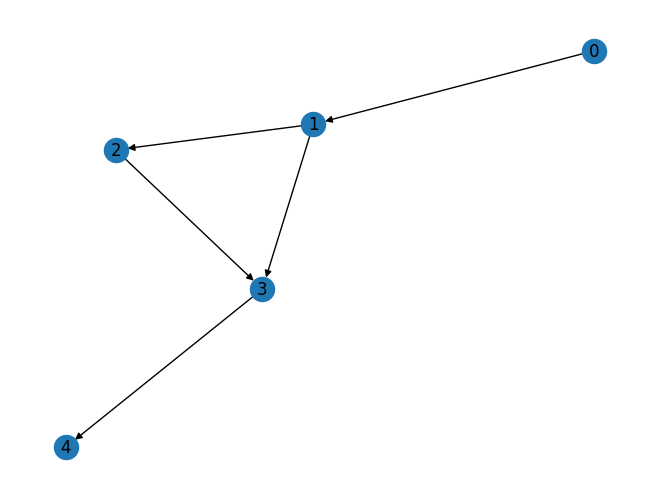

In [4]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.draw(G, with_labels=True)
plt.show()

In [81]:
# get the eigenvalue of A
eig_val, eig_vec = np.linalg.eig(A)

print(eig_val.max())

(0.9999999999999989+0j)


In [82]:
r = eig_vec[0].imag
print(r)

[ 0.          0.1636292  -0.1636292  -0.28663576  0.28663576]


In [62]:
def katz_centrality(A,alpha=0.1):
    n = A.shape[0]
    return (np.linalg.inv(np.identity(n)-alpha*(A.T))-np.identity(n))@np.ones(n)


katz_centrality(A)

array([0.11222234, 0.11122223, 0.11112222, 0.22223445, 0.12222344])

In [57]:
nx.katz_centrality(G)

{0: 0.4376085770115868,
 1: 0.43721508342863197,
 2: 0.43717573800487886,
 3: 0.480893303936282,
 4: 0.44154355218655905}

In [5]:
nx.pagerank(G)

{0: 0.0837586728746943,
 1: 0.1549532353848313,
 2: 0.17156569596398963,
 3: 0.2734936923456352,
 4: 0.3162287034308498}